# Library

In [1]:
#main
import pandas as pd
import numpy as np
#viz
import seaborn as sns 
import matplotlib.pyplot as plt 
#mod
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Dropout 
from sklearn.metrics import mean_absolute_error

In [2]:
import os
list = os.listdir("saham")
list

['MDKA.csv',
 'PNLF.csv',
 'BBRI.csv',
 'MYOR.csv',
 'UNTR.csv',
 'ENRG.csv',
 'ADRO.csv',
 'TLKM.csv',
 'MNCN.csv',
 'BBCA.csv',
 'ECII.csv',
 'PNBN.csv',
 'MFIN.csv',
 'PGAS.csv',
 'HOKI.csv',
 'MCAS.csv',
 'KLBF.csv',
 'BMRI.csv',
 'SCCO.csv',
 'SMGR.csv',
 'ASII.csv',
 'GOTO.csv',
 'MAPI.csv',
 'CSMI.csv',
 'MYOH.csv',
 'MLBI.csv',
 'MEDC.csv',
 'AMRT.csv',
 'BBNI.csv',
 'KBLI.csv',
 'ENAK.csv',
 'EXCL.csv',
 'TOWR.csv',
 'BUMI.csv',
 'BBTN.csv',
 'INCO.csv',
 'ICBP.csv']

In [3]:
datasets = []
for file in list:
    name = file.split(".")[0]
    datasets.append(name)
print(datasets)

['MDKA', 'PNLF', 'BBRI', 'MYOR', 'UNTR', 'ENRG', 'ADRO', 'TLKM', 'MNCN', 'BBCA', 'ECII', 'PNBN', 'MFIN', 'PGAS', 'HOKI', 'MCAS', 'KLBF', 'BMRI', 'SCCO', 'SMGR', 'ASII', 'GOTO', 'MAPI', 'CSMI', 'MYOH', 'MLBI', 'MEDC', 'AMRT', 'BBNI', 'KBLI', 'ENAK', 'EXCL', 'TOWR', 'BUMI', 'BBTN', 'INCO', 'ICBP']


In [4]:
data = {}
for i in datasets:
    data[i] = pd.read_csv("saham/" + i + ".csv")

In [5]:
data['ASII'].head()

,Unnamed: 0,timestamp,open,low,high,close,volume
0,0,2022-09-16,7000,6900,7050,6900,65885100
1,1,2022-09-19,6950,6925,7225,7125,52232700
2,2,2022-09-20,7150,7100,7250,7175,47337700
3,3,2022-09-21,7125,7100,7200,7150,26007500
4,4,2022-09-22,7025,7000,7225,7175,26295200


In [6]:
for i in datasets:
  data[i].drop(['Unnamed: 0', 'open', 'low', 'high', 'volume'], axis=1, inplace=True)

In [7]:
for i in datasets:
  data[i]['timestamp'] = pd.to_datetime(data[i]['timestamp'])

In [8]:
for i in datasets:
  data[i] = data[i].set_index('timestamp')

In [9]:
for i in datasets:
  na = data[i].isna().sum()

na

close    0
dtype: int64

In [10]:
data['ASII'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2022-09-16 to 2022-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   close   61 non-null     int64
dtypes: int64(1)
memory usage: 976.0 bytes


In [11]:
data['ASII'].tail()

,close
timestamp,
2022-12-05,6025
2022-12-06,5875
2022-12-07,5725
2022-12-08,5675
2022-12-09,5675


In [12]:
data_new = {}
for i in datasets:
  size = int(len(data[i]) * 0.8)
  data_new[i] = {}
  data_new[i]['train'] = data[i]['close'].iloc[0:size]
  data_new[i]['test'] = data[i]['close'].iloc[size:len(data[i])]

<ipython-input-13-f9a254ea2498>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,4))


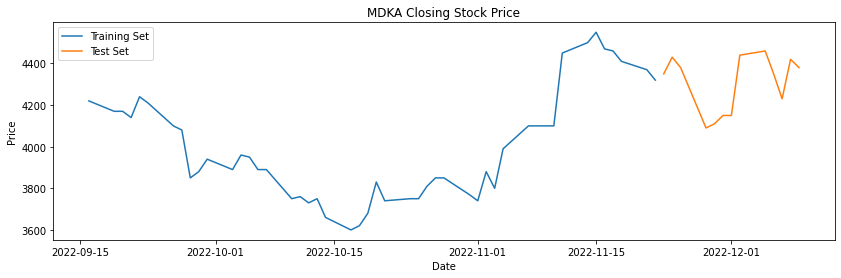

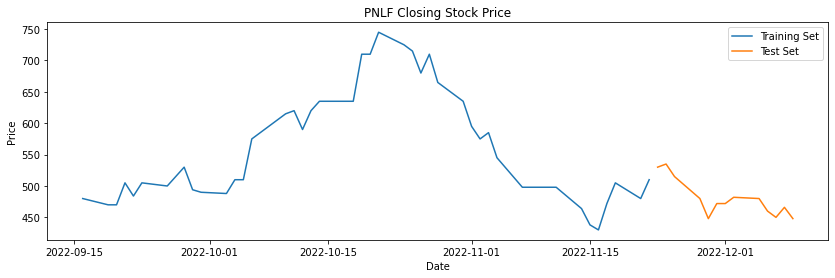

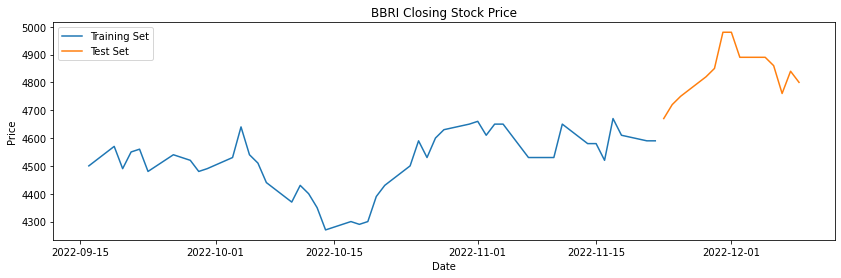

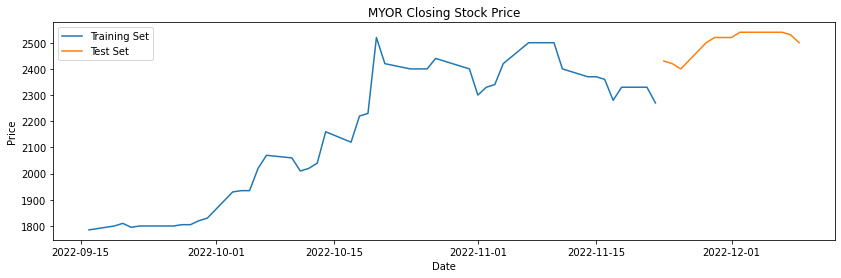

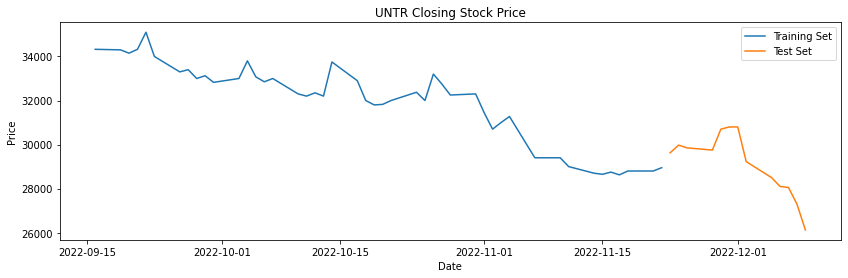

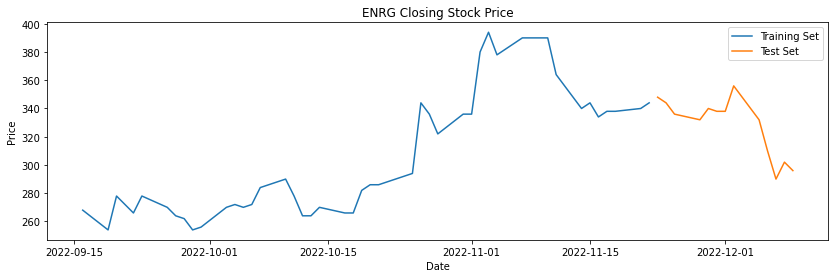

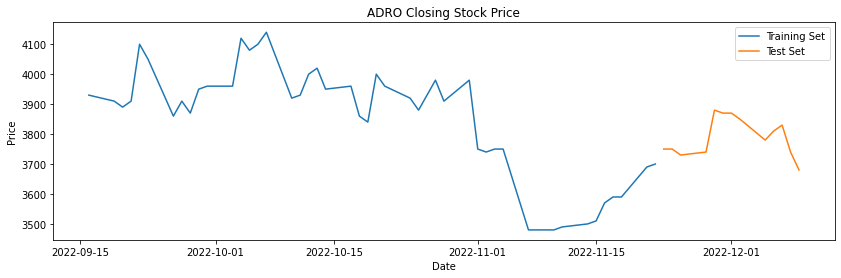

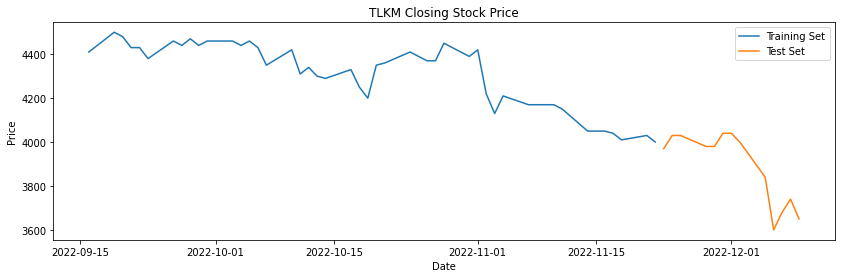

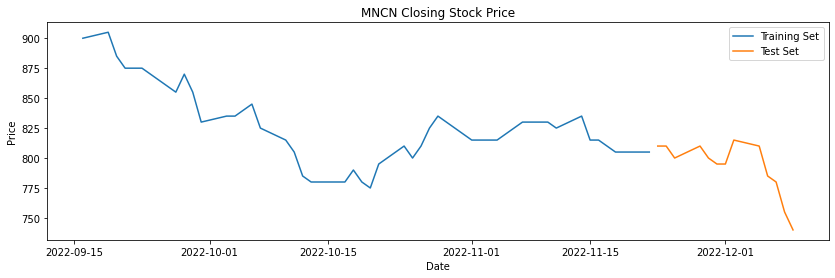

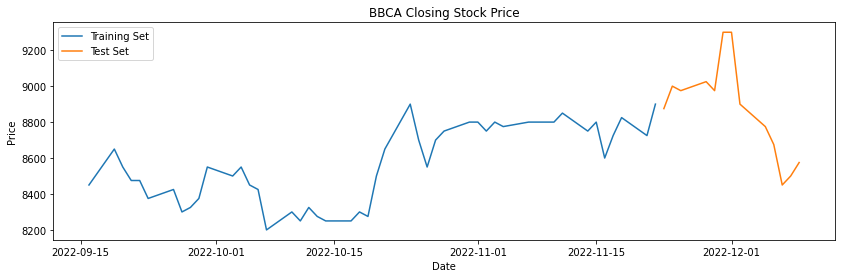

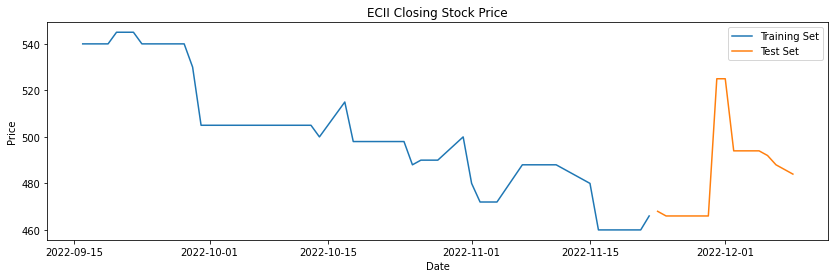

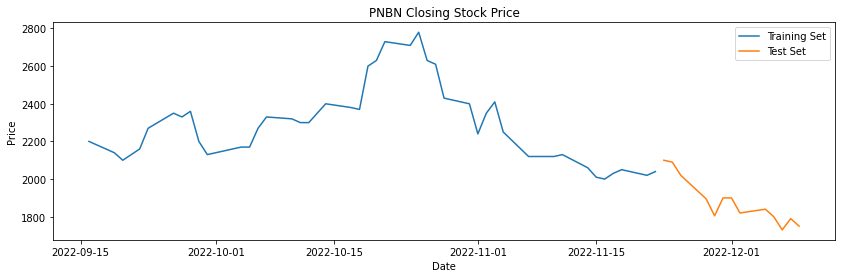

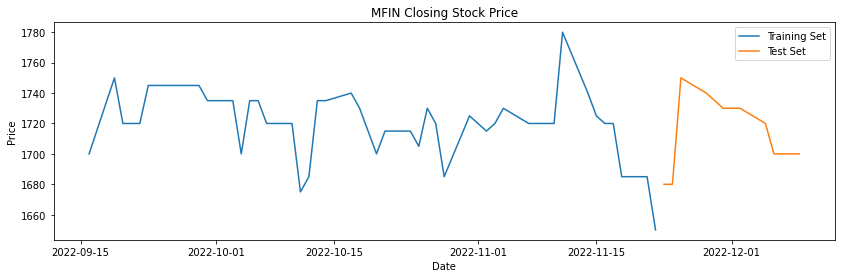

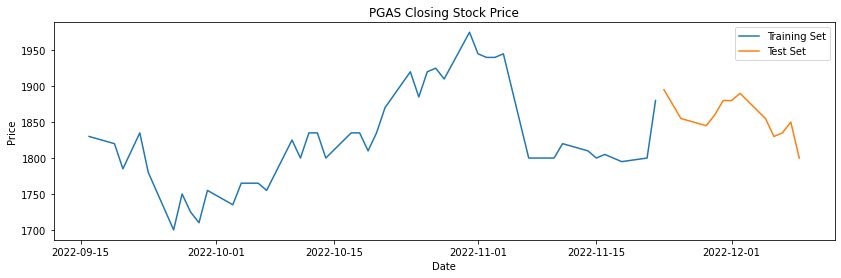

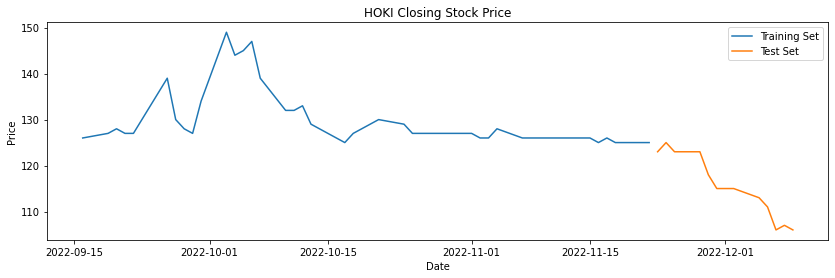

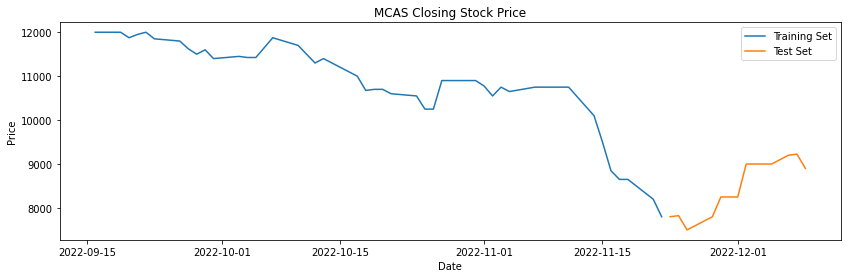

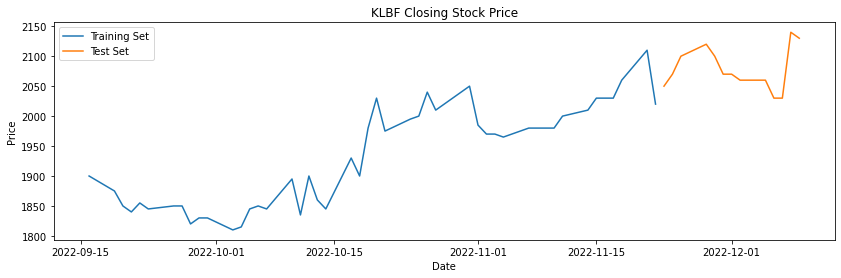

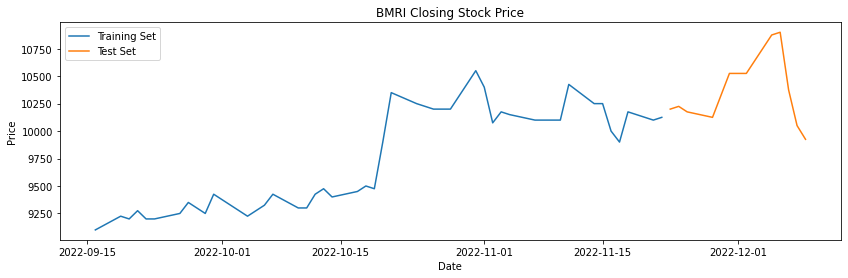

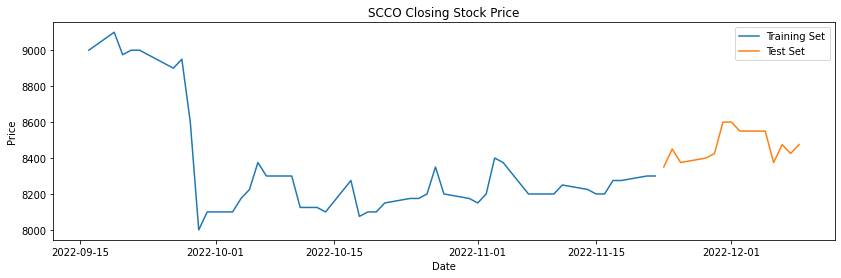

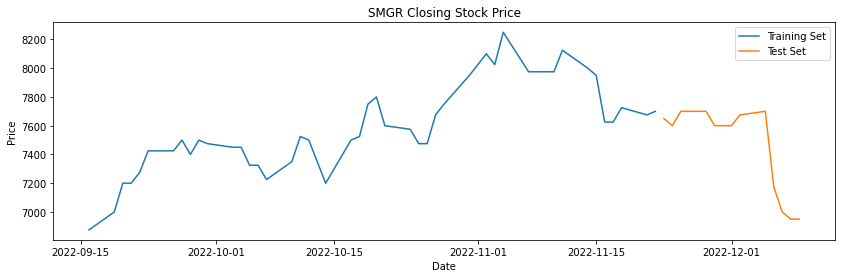

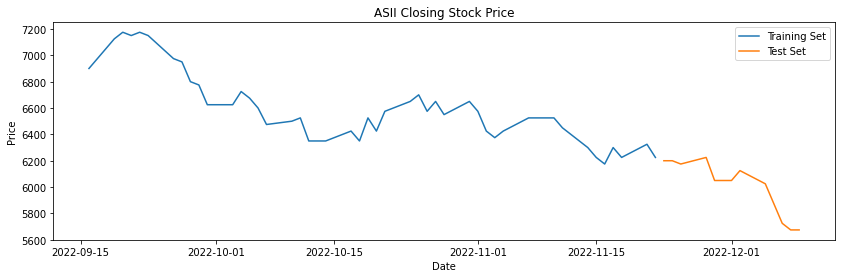

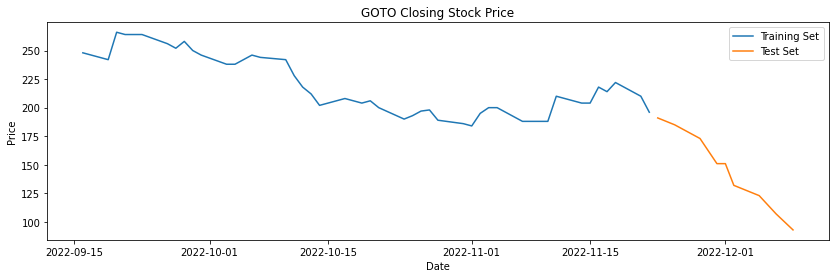

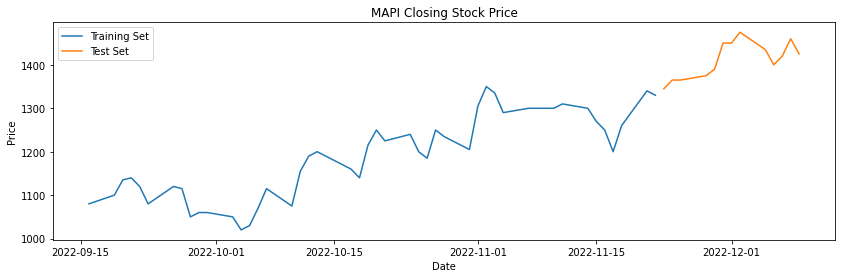

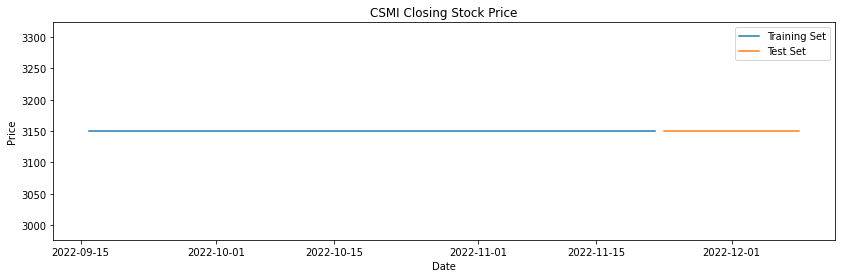

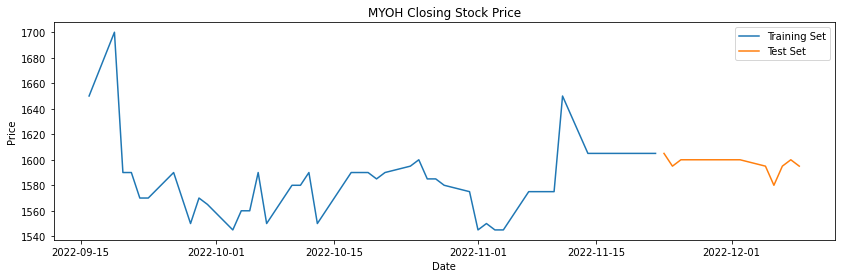

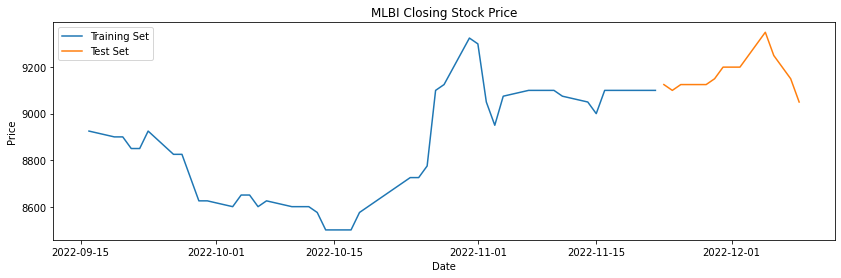

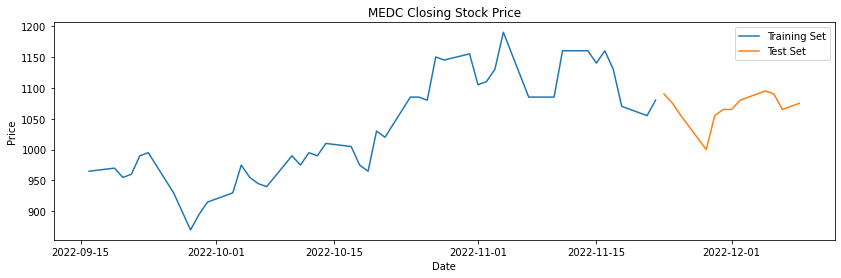

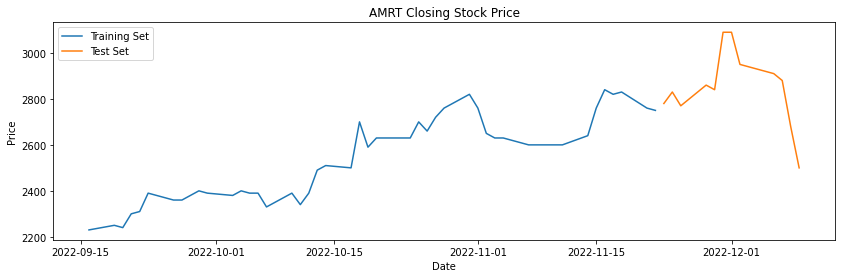

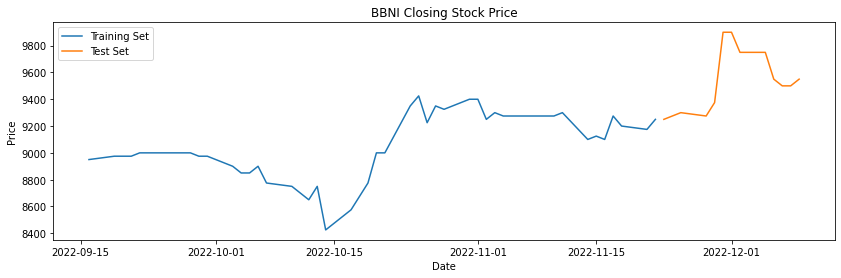

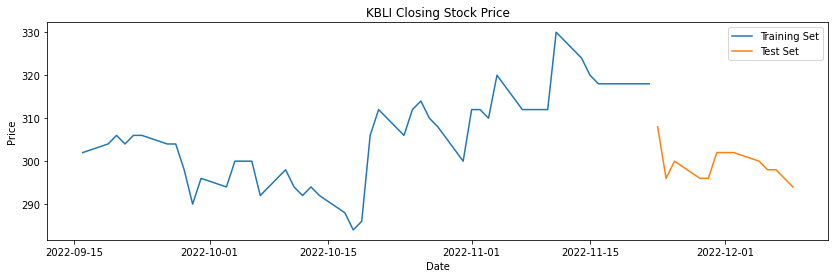

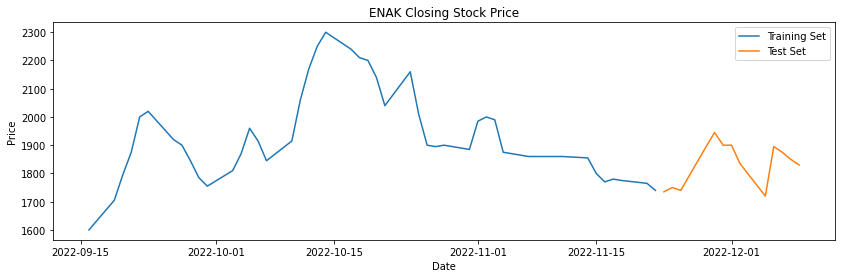

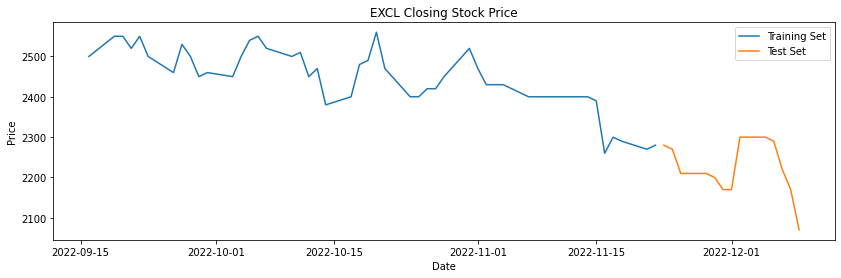

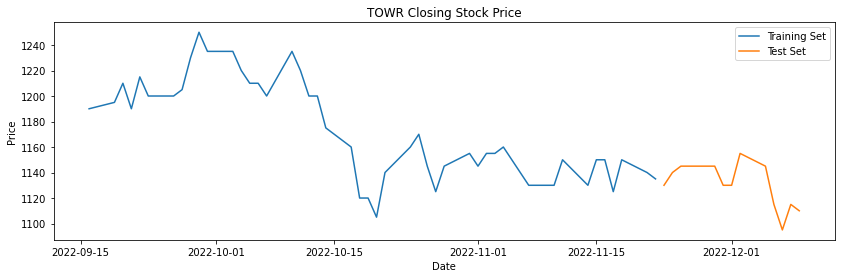

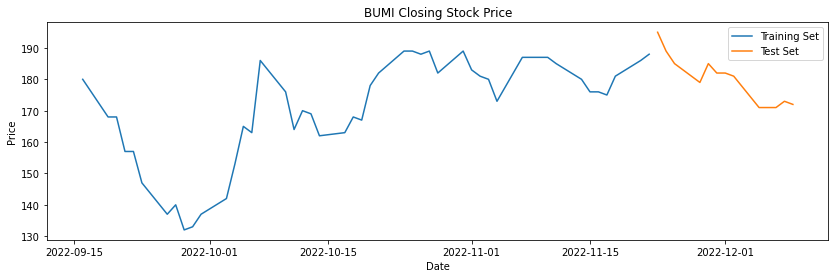

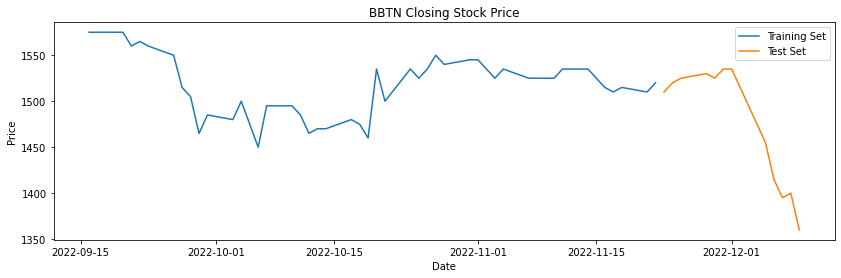

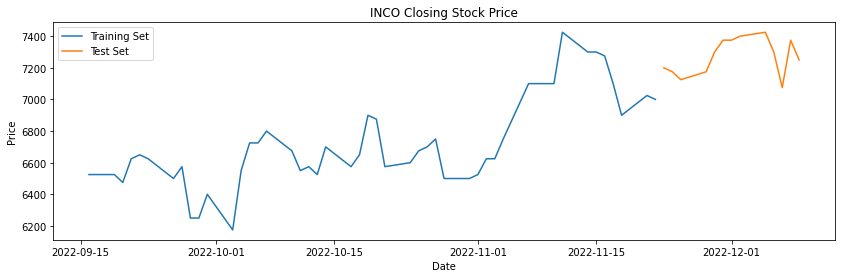

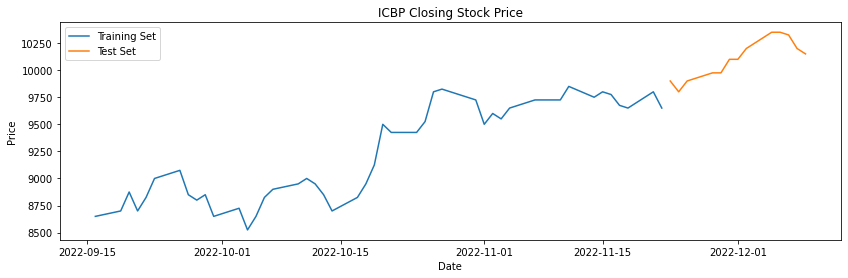

In [13]:
for i in datasets:
    plt.figure(figsize=(14,4))
    plt.plot(data_new[i]["train"])
    plt.plot(data_new[i]["test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [14]:
#Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(datasets):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_new[i]["train"])
    a1 = np.array(data_new[i]["test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [15]:
transform_test['ADRO'].shape, transform_train['ADRO'].shape

((13, 1), (48, 1))

In [16]:
trainset = {}
testset = {}
for j in datasets:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(1, 48):
        X_train.append(transform_train[j][i-1:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(1, 13):
        X_test.append(transform_test[j][i-1:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [17]:
arr_buff = []
for i in datasets:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=datasets)

,X_train,y_train,X_test,y_test
MDKA,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
PNLF,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
BBRI,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
MYOR,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
UNTR,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
ENRG,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
ADRO,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
TLKM,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
MNCN,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"
BBCA,"(47, 1, 1)","(47,)","(12, 1, 1)","(12,)"


# Models

In [18]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.015:
      self.model.stop_training = True

earlystop = EarlyStopping(monitor='val_mae', patience=64)

In [19]:
%%time
# The LSTM architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(25))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compiling the RNN
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              metrics=["mae"], 
              loss=tf.keras.losses.Huber())

#Training Models
history = {}
for i in datasets:
    print("Train to", i)
    history[i] = model.fit(trainset[i]["X"], 
              trainset[i]["y"], 
              epochs=1000, 
              batch_size=24,
              validation_data=(testset[i]['X'], testset[i]['y']), 
              shuffle=False,
              callbacks=[Callback(), earlystop])

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 35ms/step - loss: 4.3437e-04 - mae: 0.0232 - val_loss: 1.2770e-04 - val_mae: 0.0160
Epoch 19/1000
2/2 [==============================] - 0s 49ms/step - loss: 2.6092e-04 - mae: 0.0188 - val_loss: 1.0042e-04 - val_mae: 0.0142
Train to MYOH
Epoch 1/1000
2/2 [==============================] - 0s 441ms/step - loss: 0.0135 - mae: 0.1025 - val_loss: 0.0012 - val_mae: 0.0390
Epoch 2/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.0125 - mae: 0.0995 - val_loss: 0.0012 - val_mae: 0.0394
Epoch 3/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0122 - mae: 0.0992 - val_loss: 0.0012 - val_mae: 0.0397
Epoch 4/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0124 - mae: 0.0984 - val_loss: 0.0012 - val_mae: 0.0400
Epoch 5/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.0130 - mae: 0.1023 - val_loss: 0.0012 - val_mae: 0.0402
Epoch 6/1000


1/1 [==============================] - 0s 23ms/step


<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6)

1/1 [==============================] - 0s 23ms/step


<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6)

1/1 [==============================] - 0s 22ms/step


<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6)

1/1 [==============================] - 0s 25ms/step


<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6)

1/1 [==============================] - 0s 26ms/step


<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6)

1/1 [==============================] - 0s 23ms/step


<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))
<ipython-input-20-e229586e1310>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


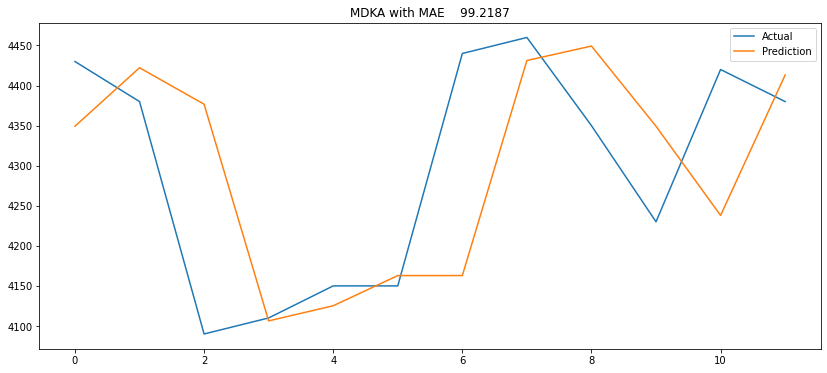

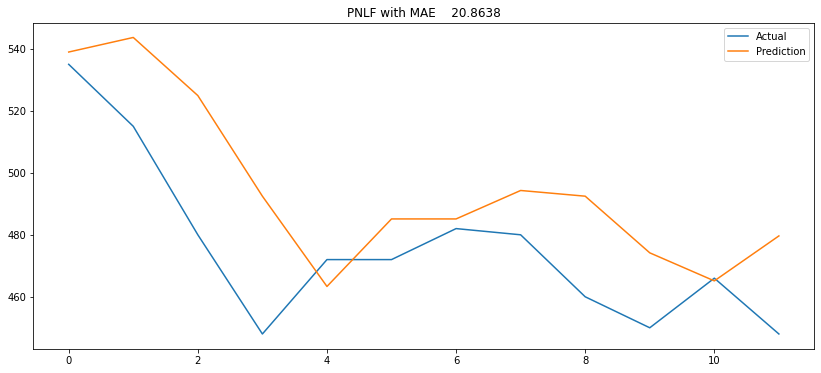

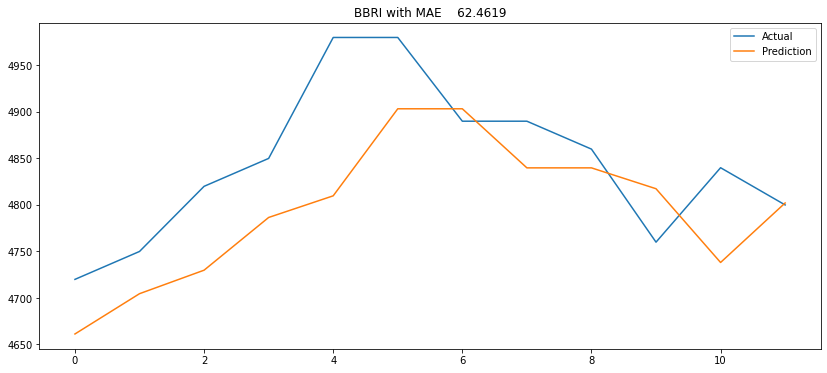

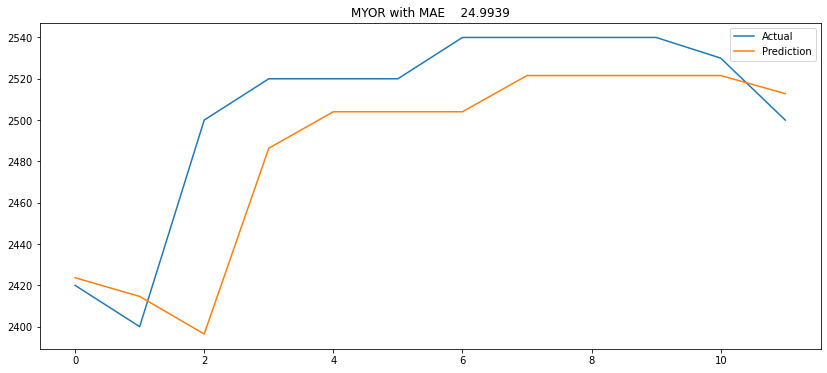

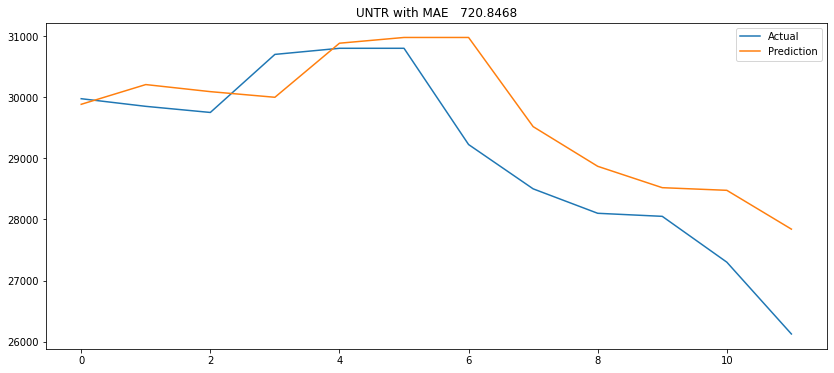

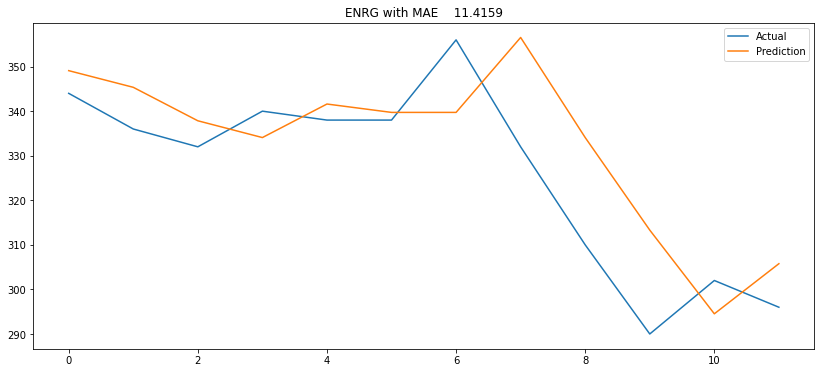

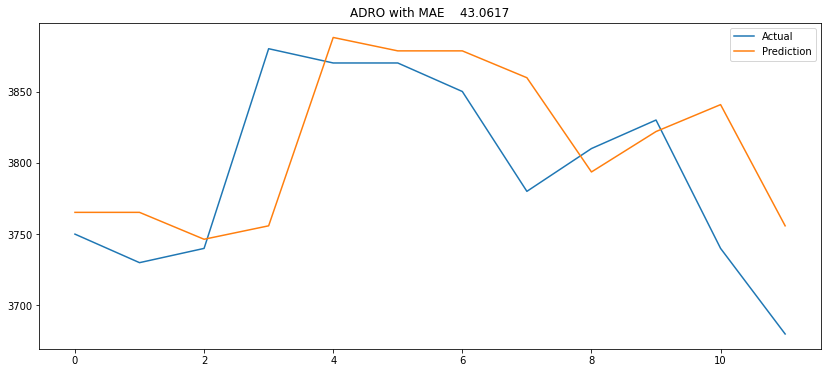

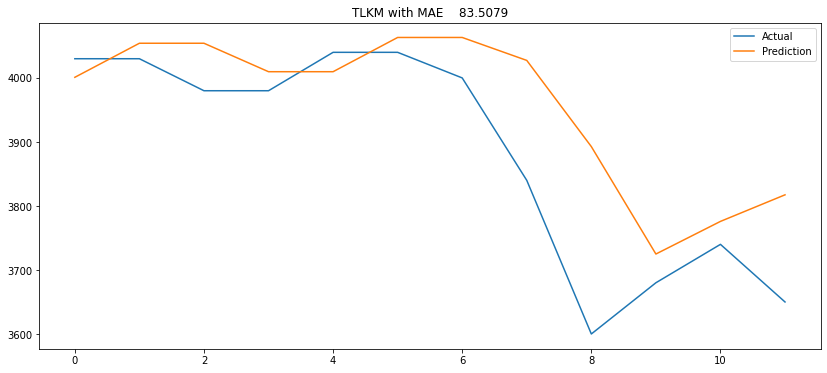

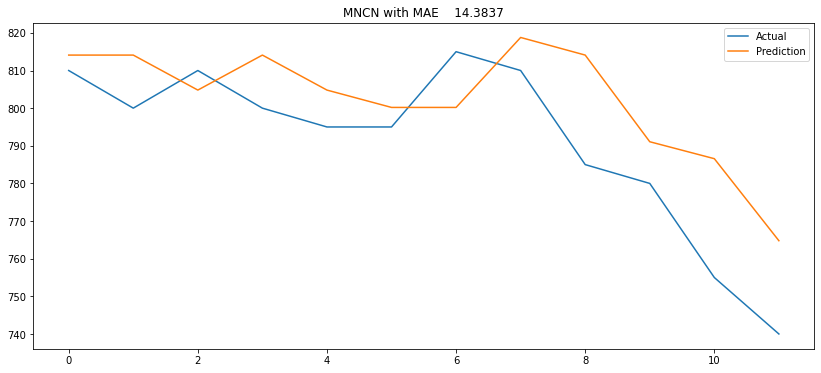

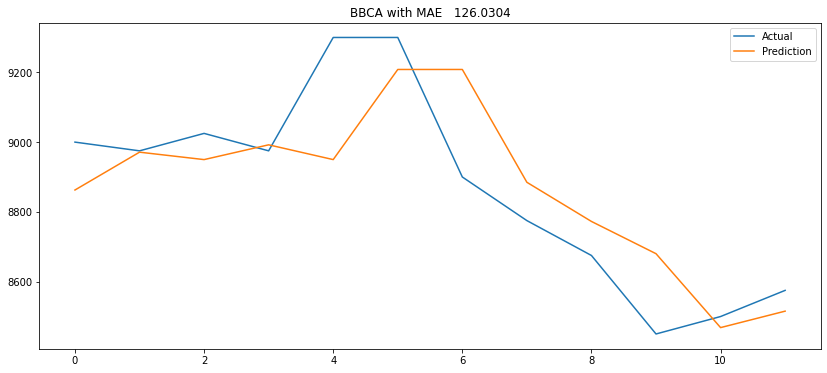

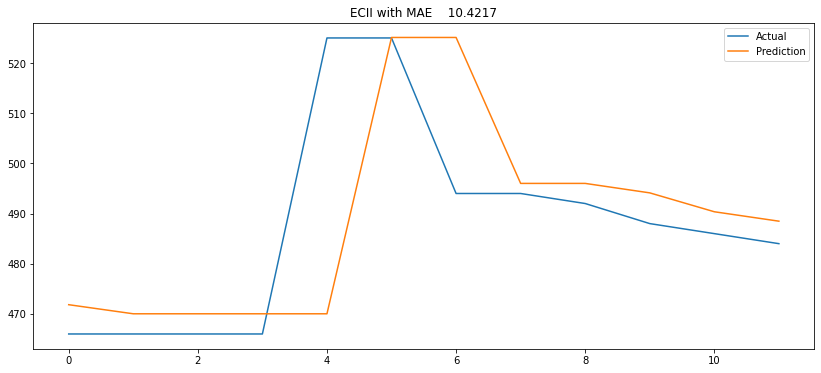

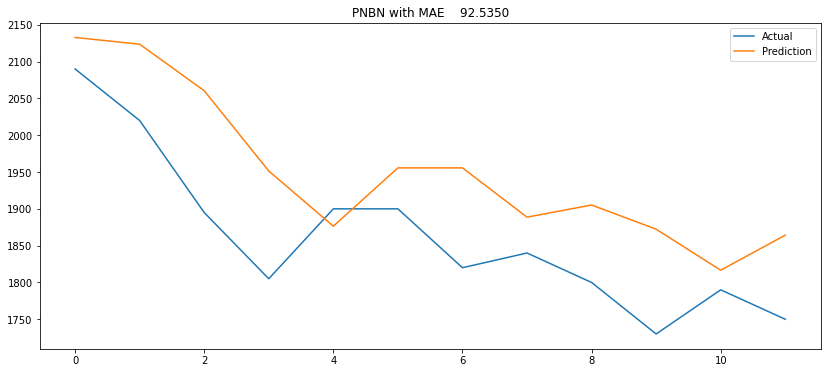

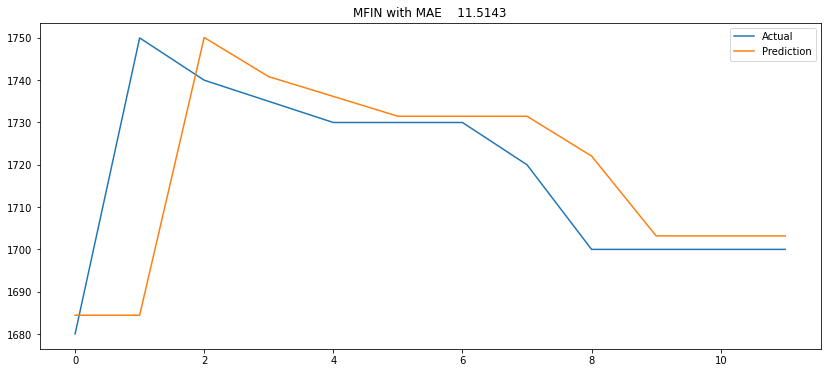

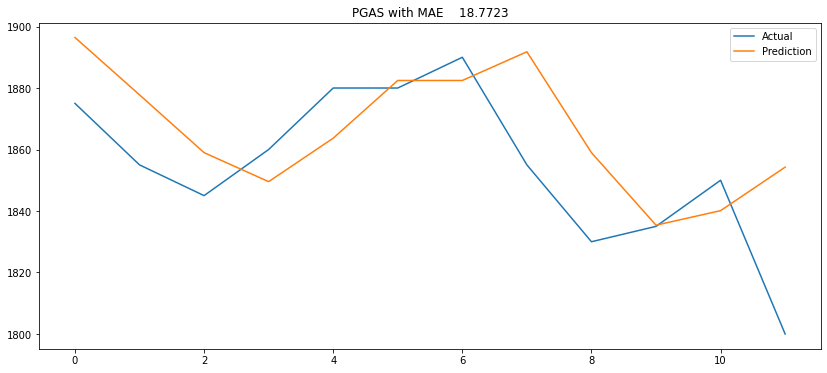

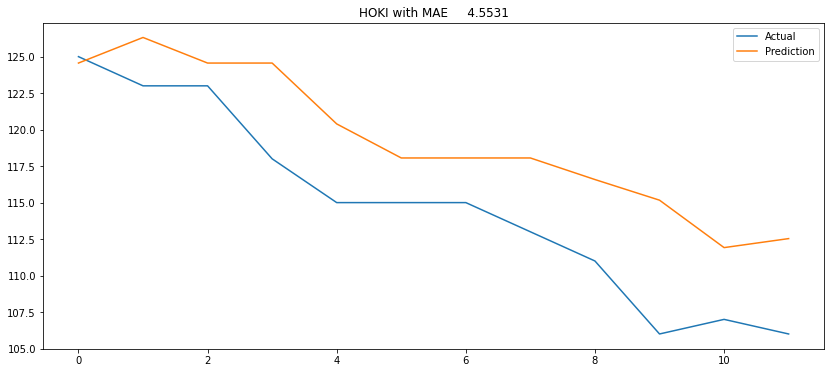

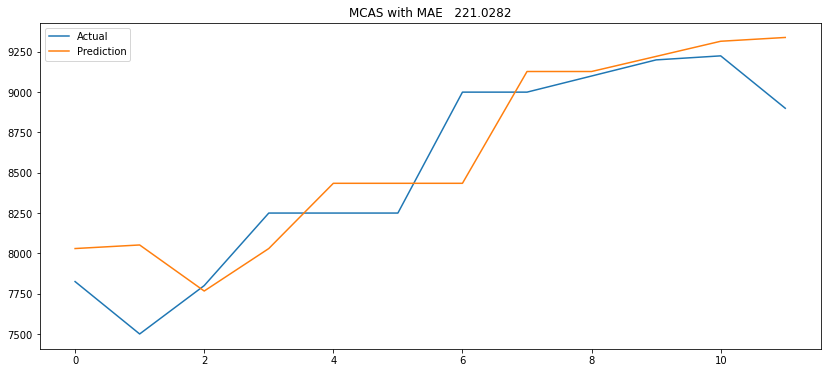

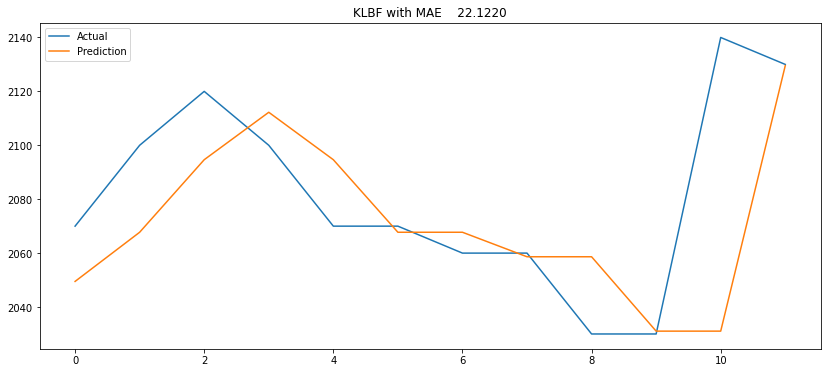

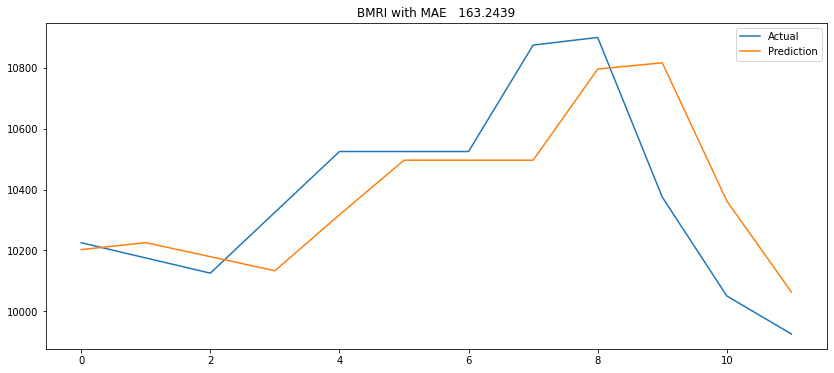

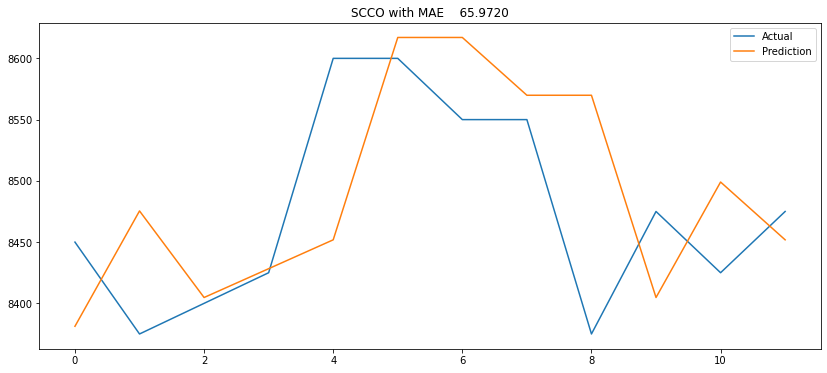

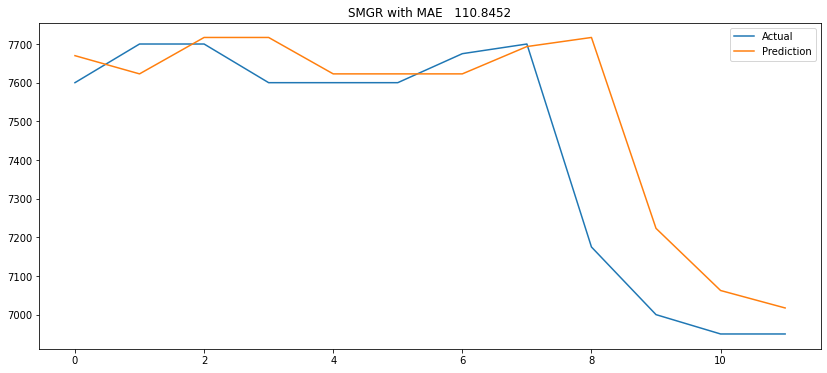

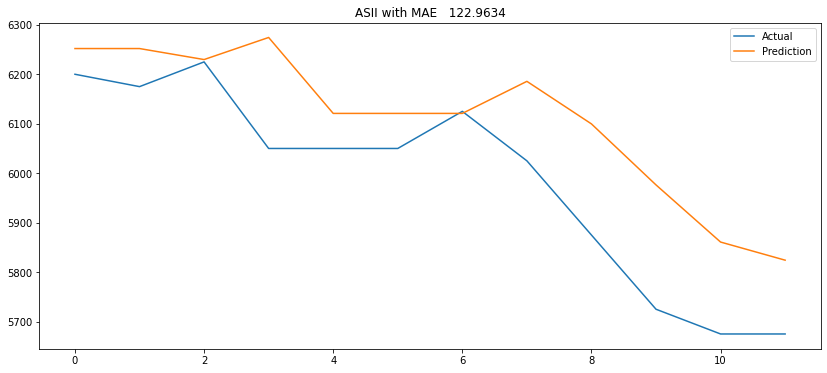

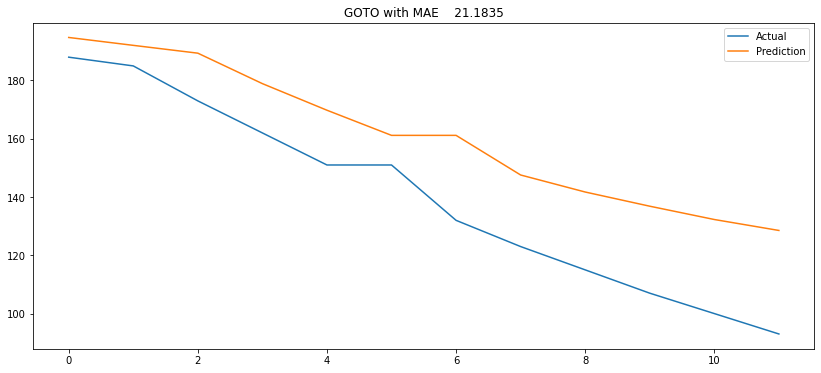

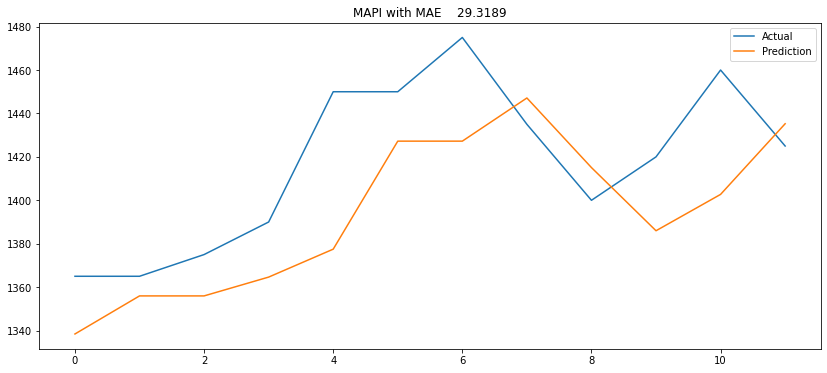

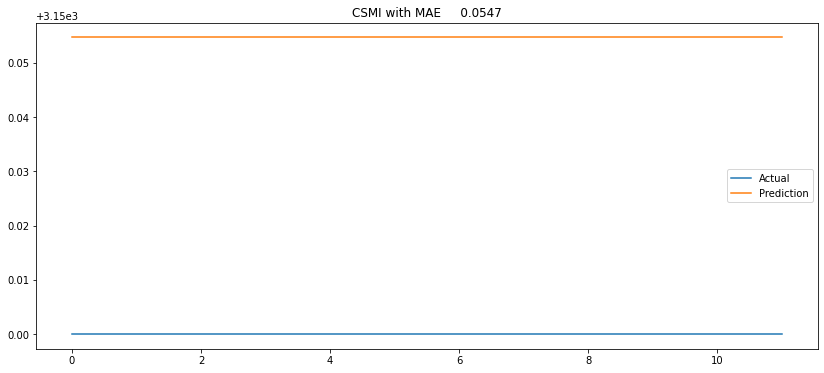

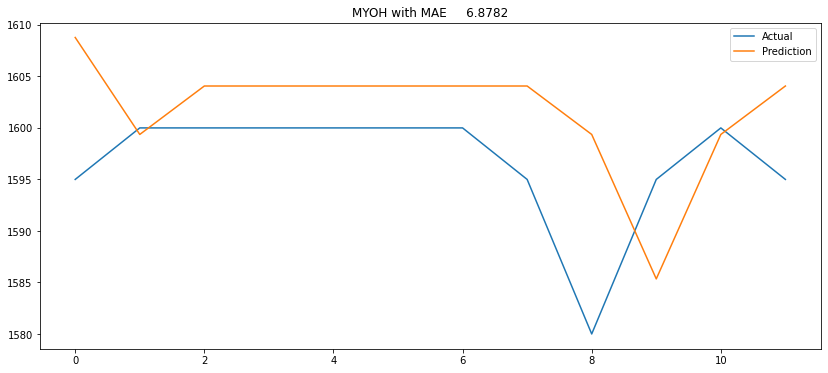

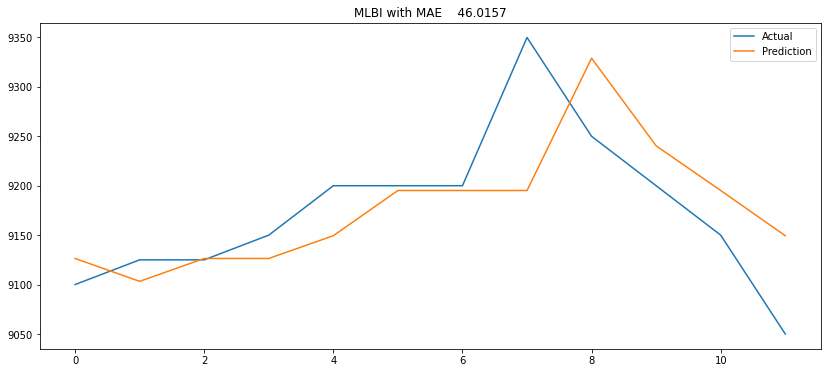

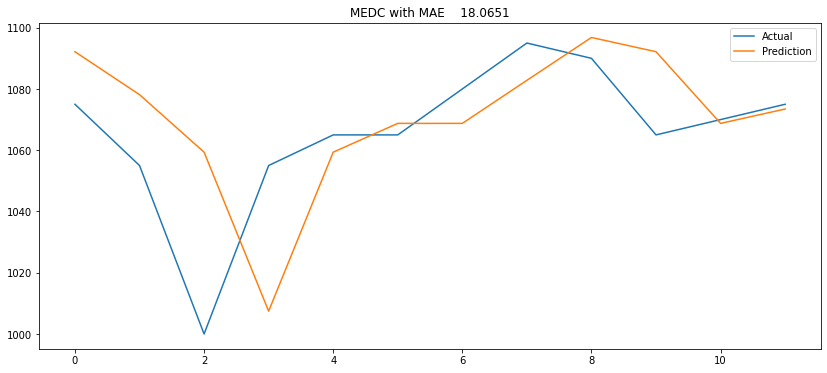

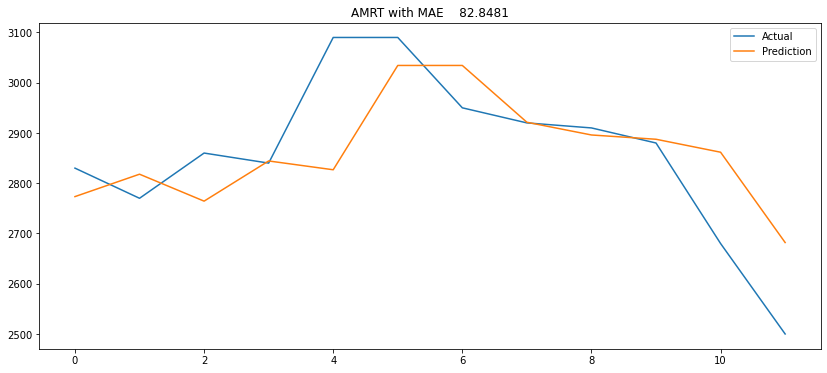

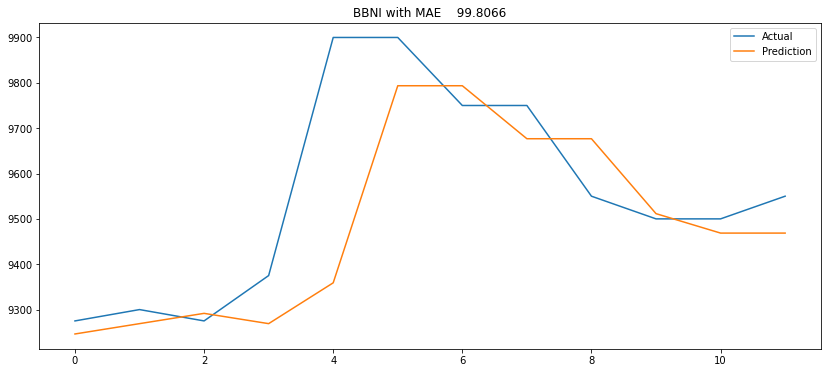

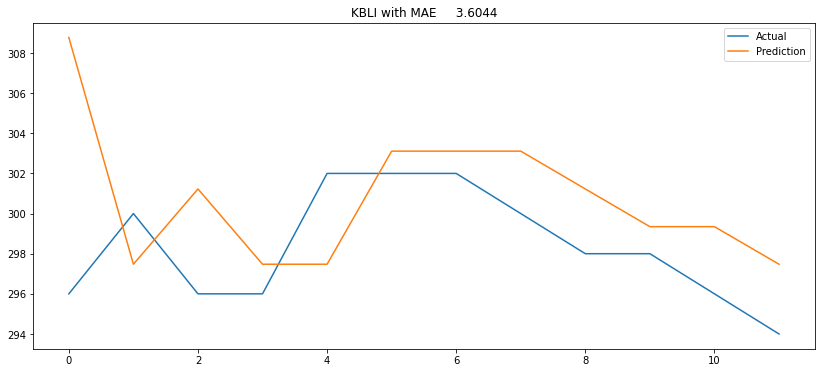

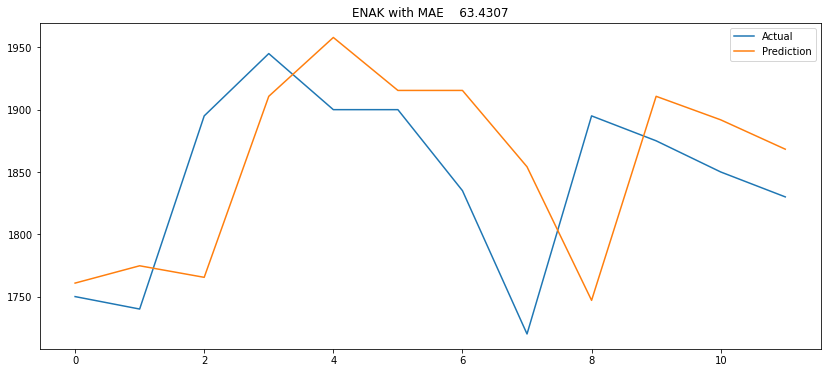

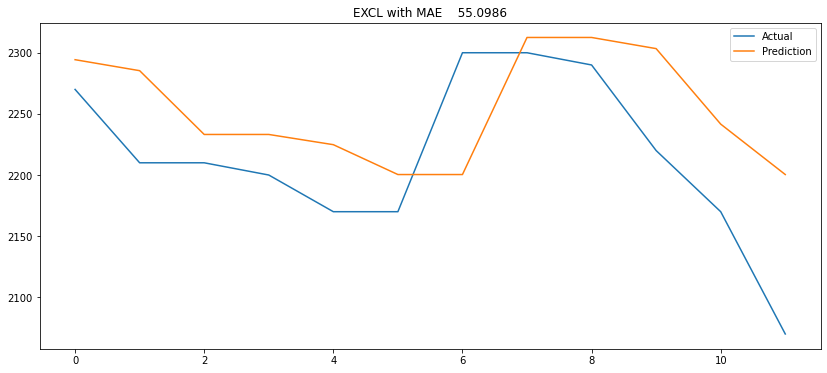

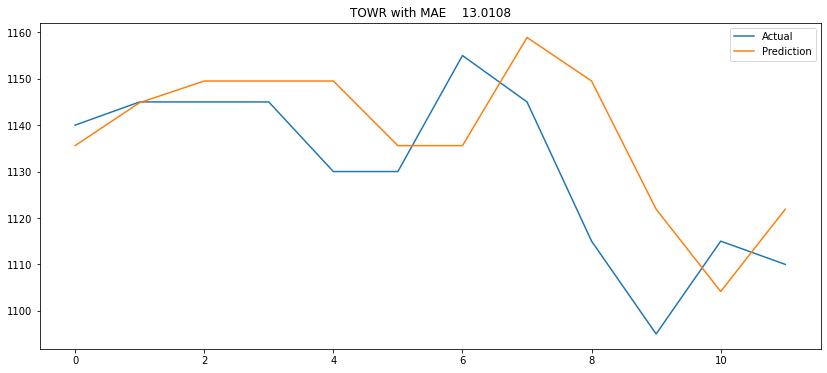

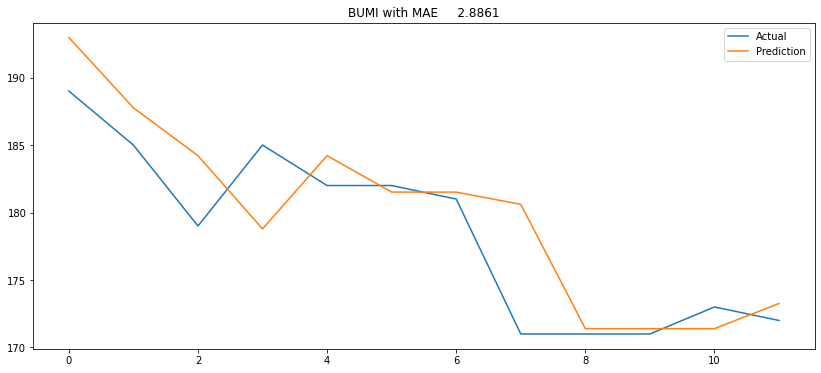

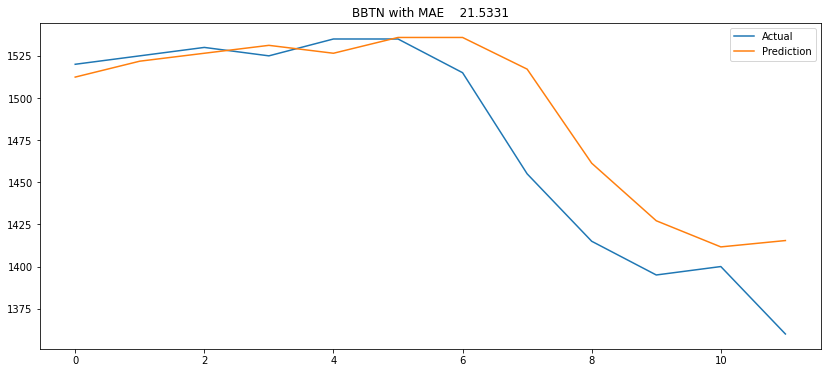

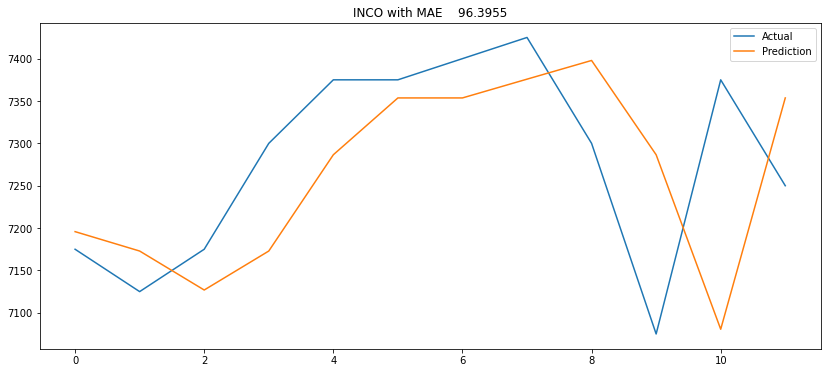

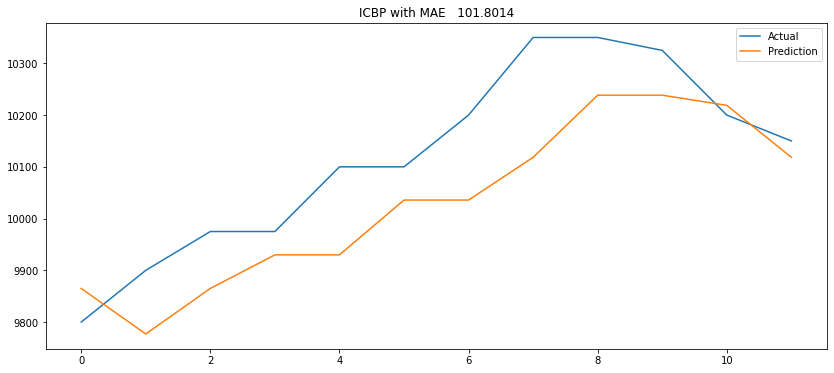

In [20]:
pred_result = {}
for i in datasets:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    MAE = mean_absolute_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MAE {:10.4f}".format(i, MAE))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(labels=['Actual', 'Prediction'])
    plt.show

In [22]:
from datetime import datetime 
win = 2
out = []
def forecast(day, x):
  data_inf = data[x]['close'].copy()
  for j in range(day):
    X = np.array(data_inf[-2:])
    X = X.reshape(X.shape[0],1)  
    X_scaled = scaler[x].transform(X)
    X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, 1))
    new_idx = datetime(data_inf.index.year[-1], data_inf.index.month[-1], data_inf.index.day[-1]+1)
    xvalue = scaler[x].inverse_transform(model.predict(X_scaled))
    data_inf[new_idx] = np.round(xvalue[1][0])
  return data_inf

In [24]:
predictors = {}
npred = {}
for i, val in enumerate(datasets):
  npred = {}
  print(i,"-",val)
  npred = forecast(1, val)
  print(npred[-2:])

0 - MDKA
1/1 [==============================] - 0s 19ms/step
timestamp
2022-12-09    4380.0
2022-12-10    4377.0
Name: close, dtype: float64
1 - PNLF
1/1 [==============================] - 0s 15ms/step
timestamp
2022-12-09    448.0
2022-12-10    463.0
Name: close, dtype: float64
2 - BBRI
1/1 [==============================] - 0s 16ms/step
timestamp
2022-12-09    4800.0
2022-12-10    4771.0
Name: close, dtype: float64
3 - MYOR
1/1 [==============================] - 0s 18ms/step
timestamp
2022-12-09    2500.0
2022-12-10    2486.0
Name: close, dtype: float64
4 - UNTR
1/1 [==============================] - 0s 24ms/step
timestamp
2022-12-09    26125.0
2022-12-10    26903.0
Name: close, dtype: float64
5 - ENRG
1/1 [==============================] - 0s 17ms/step
timestamp
2022-12-09    296.0
2022-12-10    300.0
Name: close, dtype: float64
6 - ADRO
1/1 [==============================] - 0s 18ms/step
timestamp
2022-12-09    3680.0
2022-12-10    3699.0
Name: close, dtype: float64
7 - TLKM
1/1 [=

In [31]:
label = []
percent = []
saham = []
values = []

for i, val in enumerate(datasets):
  npred = {}
  npred = forecast(1, val)

  if npred[-2] <= npred[-1]:
    xy = npred[-1] - npred[-2]
    per = round(xy/npred[-2]*100,2)
    percent.append(per)
    label.append(1)
    saham.append(val)
    values.append(npred[-1])
  else:
    xy = npred[-1] - npred[-2]
    per = round(xy/npred[-2]*100,2)
    percent.append(per)
    label.append(0)
    saham.append(val)
    values.append(npred[-1])

1/1 [==============================] - 0s 19ms/step


In [36]:
outputs = {
    'saham' : saham,
    'predict_value' : values,
    'percentage' : percent,
    'label' : label
}

In [37]:
final_saham = pd.DataFrame(outputs)
final_saham

,saham,predict_value,percentage,label
0,MDKA,4377.0,-0.07,0
1,PNLF,463.0,3.35,1
2,BBRI,4771.0,-0.60,0
3,MYOR,2486.0,-0.56,0
4,UNTR,26903.0,2.98,1
5,ENRG,300.0,1.35,1
6,ADRO,3699.0,0.52,1
7,TLKM,3756.0,2.90,1
8,MNCN,752.0,1.62,1
9,BBCA,8586.0,0.13,1


In [38]:
final_saham.to_csv('final_saham.csv')